In [24]:
import yaml
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [25]:
def read_query_results(filename):
    with open(filename, 'r') as f:
        query_results = yaml.load(f, Loader=yaml.FullLoader)
    return query_results

In [34]:
def extract_pq_wd(query_results): 
    page_quality={}
    words_in_dictionary={}
    num_articles=0
    for key,values in query_results.items():
        if key not in page_quality:
            page_quality[key]=[]
            words_in_dictionary[key]=[]
        for v in values:
            if v[0]!=None: 
                page_quality[key].append(v[0])
                rescaling=str(float(v[1])/100)
                words_in_dictionary[key].append(rescaling)
                num_articles+=1
    return page_quality, words_in_dictionary, num_articles

In [35]:
def clean_pq_wd_results(page_quality, words_in_dictionary):
    cleaned_results = {year: list(filter(lambda x: x[0] is not None, zip(pq, words_in_dictionary[year]))) for year, pq in page_quality.items()}
    cleaned_page_quality = {year: np.array([float(x[0]) for x in cr]) for year, cr in cleaned_results.items()}
    cleaned_words_in_dict = {year: np.array([float(x[1]) for x in cr]) for year, cr in cleaned_results.items()}
    return cleaned_page_quality, cleaned_words_in_dict

In [36]:
def plot_avg_clean(cleaned_page_quality, cleaned_words_in_dict):
    avg_page_quality = [np.average(cleaned_page_quality[k]) for k in sorted(cleaned_page_quality)]
    avg_words_in_dict = [np.average(cleaned_words_in_dict[k]) for k in sorted(cleaned_words_in_dict)]
    plt.plot(sorted(cleaned_page_quality),avg_page_quality, 'ro', 
         sorted(cleaned_words_in_dict),avg_words_in_dict, 'g*')
    plt.show()
    return avg_page_quality, avg_words_in_dict

In [37]:
def plot_sorted_avg_clean(cleaned_page_quality, cleaned_words_in_dict, avg_page_quality, avg_words_in_dict):
    std_page_quality = [np.std(cleaned_page_quality[k]) for k in sorted(cleaned_page_quality)]
    std_words_in_dict = [np.std(cleaned_words_in_dict[k]) for k in sorted(cleaned_words_in_dict)]
    plt.errorbar(cleaned_page_quality.keys(),
             avg_page_quality, 
             std_page_quality, 
             label='page quality',
             linestyle='None', marker='o', capsize=3)
    plt.errorbar(cleaned_words_in_dict.keys(),
             avg_words_in_dict, 
             std_words_in_dict, 
             label='words in dictionary',
             linestyle='None', marker='*', capsize=3)
    plt.legend(frameon=True, loc=3)
    plt.show()

In [38]:
def exploring_ocr(filename):
    query_results=read_query_results(filename) 
    page_quality,words_in_dicitonary,num_articles=extract_pq_wd(query_results)
    print("Number of articles %s" %num_articles)
    print("Page quality of year %s is %s" %(list(page_quality.keys())[0], page_quality[list(page_quality.keys())[0]]))
    print("Normalised words found in a dict for year %s is %s" %(list(words_in_dicitonary.keys())[0], words_in_dicitonary[list(page_quality.keys())[0]]))
    #plt.plot(page_quality[1757][0:5],'g*', words_in_dictionary[1757][0:5],'ro') 
    #plt.show()
    cleaned_page_quality,cleaned_words_in_dict=clean_pq_wd_results(page_quality,words_in_dicitonary)
    avg_page_quality, avg_words_in_dict= plot_avg_clean(cleaned_page_quality, cleaned_words_in_dict)
    plot_sorted_avg_clean(cleaned_page_quality, cleaned_words_in_dict, avg_page_quality, avg_words_in_dict)
    

### Exploring OCR quality

We have 3 results from the defoe query "ocr_quality_by_year": 

nohup spark-submit --py-files defoe.zip defoe/run_query.py findmypastdorset_data.txt fmp defoe.alto.queries.ocr_quality_by_year -r ocr_results_fmp-dorset-classify-mets18-only -n 324

Using 3 subsample datasets which follows the METS18 schema --> https://github.com/alan-turing-institute/Living-with-Machines-code/wiki/FMP-ALTO-METS-1.8-anatomy ):
    * Small subsample of Lancanshire MET18
    * Small subsample of Dorsert MET18 --> Articles that from the newspaper with the ID: 0000408
    * Subsample of Dorset METS18
    
The results of these queries were gathered in 3 results files:
    * ocr_results_lancanshire_subsample
    * ocr_results_dorset_subsample
    * ocr_results_fmp-dorset-classify-mets18-only
    
We have created several functions to allows us to explore these results. 



Number of articles 4551
Page quality of year 1757 is ['0.751', '0.748', '0.692', '0.743', '0.785', '0.771', '0.723', '0.732', '0.758', '0.768', '0.711', '0.740', '0.785', '0.729', '0.741', '0.689', '0.793', '0.775', '0.741', '0.662', '0.777', '0.784', '0.738', '0.708', '0.747', '0.747', '0.706', '0.711', '0.782', '0.737', '0.728', '0.771', '0.749', '0.743', '0.683', '0.710', '0.794', '0.751', '0.720', '0.769', '0.740', '0.760', '0.773', '0.716', '0.751', '0.745', '0.711', '0.754', '0.705', '0.750', '0.686', '0.775', '0.728', '0.766', '0.734', '0.713', '0.771', '0.744', '0.727', '0.694', '0.793', '0.748', '0.720', '0.753', '0.760', '0.779', '0.746', '0.713', '0.808', '0.786', '0.745', '0.753', '0.778', '0.769', '0.737', '0.735', '0.757', '0.774', '0.721', '0.736', '0.714', '0.761', '0.788', '0.768', '0.746', '0.723', '0.789', '0.762', '0.735', '0.745', '0.751', '0.741', '0.699', '0.747', '0.782', '0.755', '0.720', '0.749']
Normalised words found in a dict for year 1757 is ['0.68', '0.66

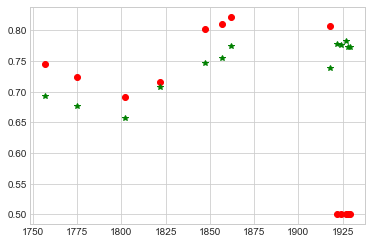

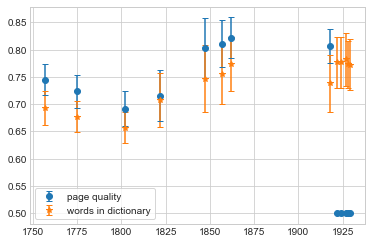

In [42]:
#### small subsample of Lancanshire sample
filename="./results/ocr_results_lancanshire_subsample"

##### dorset results exploring 0000408 dataset
#filename="./results/ocr_results_dorset_subsample"

### dorset results using ALTO and METS18 format
#filename="./results/ocr_results_fmp-dorset-classify-mets18-only"

exploring_ocr(filename)
